# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

В ходе исследования будут рассмотрены следующие вопросы:

- Есть ли зависимость между наличием детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

Перед непосредственной работой над поставленными вопросами будет проведена предобработка данных, чтобы очистить их от возможных артефактов и привести в подходящий для проведения исследования формат.

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Очистка-данных-" data-toc-modified-id="Очистка-данных--2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Очистка данных <a id="clear" rel="nofollow"></a></a></span></li><li><span><a href="#Обработка-пропусков-" data-toc-modified-id="Обработка-пропусков--2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков <a id="null" rel="nofollow"></a></a></span></li><li><span><a href="#Замена-типа-данных-" data-toc-modified-id="Замена-типа-данных--2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Замена типа данных <a id="type" rel="nofollow"></a></a></span></li><li><span><a href="#Обработка-дубликатов-" data-toc-modified-id="Обработка-дубликатов--2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка дубликатов <a id="duplicates" rel="nofollow"></a></a></span></li><li><span><a href="#Лемматизация-" data-toc-modified-id="Лемматизация--2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Лемматизация <a id="lemma" rel="nofollow"></a></a></span></li><li><span><a href="#Категоризация-данных-" data-toc-modified-id="Категоризация-данных--2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Категоризация данных <a id="categorize" rel="nofollow"></a></a></span></li></ul></li><li><span><a href="#Отвечаем-на-вопросы" data-toc-modified-id="Отвечаем-на-вопросы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Отвечаем на вопросы</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Загрузка данных

In [168]:
!pip install pymorphy2

In [169]:
import pandas as pd
import pymorphy2
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
morph = pymorphy2.MorphAnalyzer()

In [170]:
data = pd.read_csv('data.csv')
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,count,mean,std,min,25%,50%,75%,max
children,21525.0,0.538908,1.381587,-1.000000,0.000000,0.000000,1.000000,2.000000e+01
days_employed,19351.0,63046.497661,140827.311974,-18388.949901,-2747.423625,-1203.369529,-291.095954,4.017554e+05
dob_years,21525.0,43.293380,12.574584,0.000000,33.000000,42.000000,53.000000,7.500000e+01
education_id,21525.0,0.817236,0.548138,0.000000,1.000000,1.000000,1.000000,4.000000e+00
family_status_id,21525.0,0.972544,1.420324,0.000000,0.000000,0.000000,1.000000,4.000000e+00
debt,21525.0,0.080883,0.272661,0.000000,0.000000,0.000000,0.000000,1.000000e+00
total_income,19351.0,167422.302208,102971.566448,20667.263793,103053.152913,145017.937533,203435.067663,2.265604e+06


In [171]:
data.sample(5, random_state=0)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
7340,2,-3818.249310,39,среднее,1,женат / замужем,0,F,сотрудник,0,40930.315696,покупка жилья
3957,0,-12111.680981,47,среднее,1,женат / замужем,0,F,компаньон,0,108406.132467,покупка коммерческой недвижимости
6605,0,-3617.168602,48,среднее,1,Не женат / не замужем,4,M,сотрудник,1,214785.654014,получение высшего образования
14910,0,NaN,20,среднее,1,Не женат / не замужем,4,M,сотрудник,0,NaN,покупка жилой недвижимости
763,0,NaN,21,среднее,1,гражданский брак,1,M,компаньон,0,NaN,покупка жилья


**Вывод**

1. Столбцы "days_employed" и "total_income" содержат одинаковое количество пропусков и данные в них записаны в виде чисел с плавающей точкой.
3. В столбце "days_employed" много отрицательных значений, также есть значения слишком большие и слишком маленькие, возможно, запись не в днях.
4. В столбце 'dob_years' есть нули.
5. Дубликаты в "education".
6. В столбце с кол-вом детей есть как отрицательные значения, так и подозрительно большие.

## Предобработка данных

### Очистка данных <a id="clear"></a>

*Посчитаем сколько в таблице отрицательных значений в кол-ве детей.*

In [172]:
data[data['children'] < 0]['children'].count()

47

*Всего 47 записей, уберем их.*

In [173]:
data = data[data['children'] >= 0]

*Посчитаем сколько в таблице строк с 0 возрастом.*

In [174]:
data[data['dob_years'] == 0]['dob_years'].count()

101

**Вывод**

Так как наличие детей является одним из параметров, по которому проводится исследование, принято решение убрать из таблицы строки, в которых наличие или отсутствие детей нельзя определить из-за ошибки в данных. Возраст, напротив, не фигурирует ни в одном из поставленных перед исследованием вопросов, поэтому 0 можно игнорировать, данные по возрасту никак не повлияют на ход исследования.

### Обработка пропусков <a id="null"></a>

*Посмотрим, где и в каком кол-ве есть пропуски*

In [175]:
data.isna().sum()

children               0
days_employed       2171
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2171
purpose                0
dtype: int64

Пропуски обнаружены в одинаковом количестве в ежемесячном доходе и рабочем стаже. Скорее всего, эти пропуски соответсвуют одним и тем же строкам.

*Произведем замены пропусков на медианные значения по типам дохода методом 'fillna'*

In [176]:
data['total_income'] = data['total_income'].fillna(
    data.groupby('income_type')['total_income'].transform('median'))
data['days_employed'] = data['days_employed'].fillna(
    data.groupby('income_type')['days_employed'].transform('median'))

*Проверим, у всех ли типов занятости встречаются отрицательные значения в трудовом стаже*

In [177]:
data.groupby('income_type')['days_employed'].min()

income_type
безработный        337524.466835
в декрете           -3296.759962
госслужащий        -15193.032201
компаньон          -17615.563266
пенсионер          328728.720605
предприниматель      -520.848083
сотрудник          -18388.949901
студент              -578.751554
Name: days_employed, dtype: float64

**Вывод**

10 % данных не содержат информации о ежемесячном доходе и стаже, это могло бы быть связано с тем, что эти данные не сообщались, но есть сомнения, что 2171 человека несговариваясь решили не сообщать именно данные о стаже и доходе. Возможно, имеет место ошибка заполнения данных?

В трудовом стаже данные очевидно не соответсвуют трудовому стажу в днях - есть отрицательные значения, слишком большие и слишком малые числа, можно предположить, что данные заполнялись в разных форматах. Нет отрицательных значений только у пенсионеров и безработных, возможно, это связано с тем, что этим категориям стаж не начисляется?

Так как значения трудового стажа никак не фигурируют в поставленных перед исследованием вопросах, их можно заменить на медианы, данные не повлияют на ход исследования.

В таблице не заполнено 10% в значениях ежемесячного дохода - достаточно крупная часть данных, ее удаление может повлиять на статистику и результаты исследования. В связи с этим было принято решение заменить пропуски в  ежемесячном доходе на медианные значения по тем же типам занятости. Медианные значения взяты, чтобы не учитывать выбросы в данных.

### Замена типа данных <a id="type"></a>

*Меняем тип данных в трудовом стаже и в ежемесячном доходе методом astype*

In [178]:
data['days_employed'] = data['days_employed'].astype('int')
data['total_income'] = data['total_income'].astype('int')

*Заменяем отрицательные значения на абсолютные в трудовом стаже*

In [179]:
data['days_employed'] = abs(data['days_employed'])

*Меняем тип данных в стоблцах 'education', 'family_status', 'income_type', 'gender' для снижения кол-ва затрачиваемой памяти.*

In [180]:
data['education'] = data['education'].astype('category')
data['family_status'] = data['family_status'].astype('category')
data['income_type'] = data['income_type'].astype('category')
data['gender'] = data['gender'].astype('category')

**Вывод**

Заменили тип данных в трудовом стаже на целочисленный в абсолютных значениях, так как трудовой стаж исчисляется в целых днях и не может иметь отрицательное значение. Заменили тип данных в ежемесячном доходе на целочисленный. В целях оптимизации заменили тип данных на категоральный в столбцах 'education', 'family_status', 'income_type', 'gender'.

### Обработка дубликатов <a id="duplicates"></a>

*Посмотрим на уникальные значения в столбце 'education' методом value_counts, чтобы найти дубликаты*

In [181]:
data['education'].value_counts()

среднее                13719
высшее                  4710
СРЕДНЕЕ                  768
Среднее                  709
неоконченное высшее      667
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

*Приведем строки в столбце 'education' к нижнему регистру методом str.lower и убедимся, что больше нет дубликатов*

In [182]:
data['education'] = data['education'].str.lower()
data['education'].value_counts()

среднее                15196
высшее                  5251
неоконченное высшее      743
начальное                282
ученая степень             6
Name: education, dtype: int64

*Проверим кол-во идентификаторов для образования, семейного положения, задолженности и пола*

In [183]:
data['education_id'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [184]:
data['family_status_id'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [185]:
data['debt'].unique()

array([0, 1], dtype=int64)

In [186]:
data['gender'].unique()

['F', 'M', 'XNA']
Categories (3, object): ['F', 'M', 'XNA']

*Посмотрим на строки, где пол не определен*

In [187]:
data[data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости


*Есть строка, где пол не определен, т.к. на исследование информация о поле никак не повлияет, оставим ее нетронутой.
В остальных идентификаторах дубликатов не найдено.*

*Посмотрим на уникальные значения в столбце 'family_status' и 'income_type', чтобы найти дубликаты.*

In [188]:
data['family_status'].value_counts()

женат / замужем          12351
гражданский брак          4172
Не женат / не замужем     2808
в разводе                 1191
вдовец / вдова             956
Name: family_status, dtype: int64

In [189]:
data['income_type'].value_counts()

сотрудник          11093
компаньон           5076
пенсионер           3848
госслужащий         1455
безработный            2
предприниматель        2
в декрете              1
студент                1
Name: income_type, dtype: int64

*Дубликатов не обнаружено.*

**Вывод**

Удалены дубликаты в данных об образовании, для этого все значения приведены к нижнему регистру. Скорее всего, дубликаты появились в результате записи данных человеком (если бы форма для записи данных была, например, выпадающим списком, то дубликатов бы не было).

### Лемматизация <a id="lemma"></a>

*Лемматизируем столбец с целями кредита и подсчитаем кол-во лемм.*

In [190]:
lemmas = list()
for line in data['purpose']:
    for word in line.split():
        p = morph.parse(word)[0]
        lemmas.append(p.normal_form)

print(Counter(lemmas))

Counter({'недвижимость': 6351, 'покупка': 5899, 'жильё': 4465, 'автомобиль': 4304, 'образование': 4012, 'с': 3546, 'операция': 2603, 'свадьба': 2346, 'на': 2229, 'свой': 2228, 'строительство': 1877, 'высокий': 1374, 'коммерческий': 1314, 'получение': 1314, 'для': 1293, 'жилой': 1228, 'подержать': 966, 'сделка': 943, 'заняться': 908, 'дополнительный': 906, 'проведение': 776, 'сыграть': 773, 'сдача': 652, 'семья': 641, 'собственный': 634, 'ремонт': 611, 'приобретение': 460, 'профильный': 434})


*Часто встречается слово "операция", стоит убедиться, что речь не про хирургическое вмешательство.*

In [191]:
operations = False  # задаем переменной значение False
for line in data['purpose']:  # для каждой строки в столбце с целью кредита
    if 'операц' in line:  # если в строке есть 'операц'
        # если в этой же строке с 'операц' нет 'недвиж' и нет 'жил'
        if ('недвиж' not in line) and ('жил' not in line):
            operations = True  # значение переменной меняется на True, что означает, что в целях кредита есть слово операция не относящееся к недвижимости или жилью
operations  # печатаем перемнную

False

*В целях кредита отсутсвуют операции, связанные со здоровьем.*

**Вывод**

По итогам можно выделить 4 категории: недвижимость, автомобиль, образование, свадьба.

### Категоризация данных <a id="categorize"></a>

*Категоризируем данные по целям кредита с помощью лемм и добавим данные о присвоенных категориях в таблицу.*

In [192]:
# создаем функцию для категоризации целей получения кредита
def categorized_purpose(row):
    line = row['purpose']
    if ('жил' in line) or ('недвиж' in line):
        return 'недвижимость'
    if 'авто' in line:
        return 'автомобиль'
    if 'образован' in line:
        return 'образование'
    if 'свадьб' in line:
        return 'свадьба'
    return 'ошибка'

In [193]:
# применяем функцию через метод apply к таблице, результат функции записываем в здесь же созданный столбец 'categorized_purpose',
data['categorized_purpose'] = data.apply(categorized_purpose, axis=1)
# указываем axis = 1, чтобы на функцию отправлялись строки

*Проверим как прошла категоризация.*

In [194]:
data['categorized_purpose'].value_counts()

недвижимость    10816
автомобиль       4304
образование      4012
свадьба          2346
Name: categorized_purpose, dtype: int64

*Категоризируем данные по детности.*

In [195]:
def categorized_children(row):  # создаем функцию для категоризации детности
    children = row['children']
    if children == 0:
        return 'нет детей'
    return 'есть дети'


# применяем функцию через метод apply к таблице, результат функции записываем в здесь же созданный столбец 'categorized_children',
data['categorized_children'] = data.apply(categorized_children, axis=1)
# указываем axis = 1, чтобы на функцию отправлялись строки

*Проверим как прошла категоризация.*

In [196]:
data['categorized_children'].value_counts()

нет детей    14149
есть дети     7329
Name: categorized_children, dtype: int64

*Наблюдение: клиентов без детей почти в два раза больше.*

*Категоризирем данные по ежемесячному доходу.*

In [197]:
def categorized_income(row):  # создаем функцию для категоризации ежемесячных доходов
    income = row['total_income']
    if 39000 <= income <= 99000:
        return 'средний'
    if income < 39000:
        return 'ниже среднего'
    return 'выше среднего'


# применяем функцию через метод apply к таблице, результат функции записываем в здесь же созданный столбец 'categorized_income',
data['categorized_income'] = data.apply(categorized_income, axis=1)
# указываем axis = 1, чтобы на функцию отправлялись строки

*Проверим как прошла категоризация.*

In [198]:
data['categorized_income'].value_counts()

выше среднего    17136
средний           4234
ниже среднего      108
Name: categorized_income, dtype: int64

**Вывод**

Разбили все цели получения кредита по самым частовстречающимся леммам, также свели данные по наличию детей к есть/нет, данные по доходам разбили на средний, ниже среднего и выше среднего, для коридоров категорий дохода использованы данные [Альфа-банка за 2019 год](https://bankir.ru/novosti/20190624/rossiiskii-srednii-klass-snizhaya-appetity-k-risku-polnyi-obzor-10161766/).

## Отвечаем на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

*Создаем сводную таблицу по категориям детности и кредитной задолженности c подсчетом кол-ва в каждой и сохраняем в переменную, создаем новый столбец, в котором считаем отношение кол-ва клиентов с задолженностью по кредиту к общему кол-ву клиентов с кредитом, переводим в проценты и окургляем до 2-х знаков после запятой методом round.*

In [199]:
data_pivot_children = data.pivot_table(
    index='categorized_children', columns='debt', values='total_income', aggfunc='count')
data_pivot_children['ratio_%'] = round(
    data_pivot_children[1] / (data_pivot_children[1]+data_pivot_children[0])*100, 2)
data_pivot_children

debt,0,1,ratio_%
categorized_children,,,
есть дети,6652,677,9.24
нет детей,13086,1063,7.51


In [200]:
print(
    f"Разница составляет: {round(data_pivot_children['ratio_%'][0]-data_pivot_children['ratio_%'][1], 2)}")

Разница составляет: 1.73


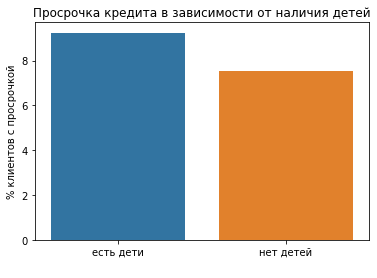

In [201]:
sns.barplot(x=data_pivot_children.index,
            y='ratio_%',
            data=data_pivot_children)
plt.title('Просрочка кредита в зависимости от наличия детей')
plt.xlabel(" ")
plt.ylabel("% клиентов с просрочкой")
plt.show()

**Вывод**

Небольшая разница в 1,7% прослеживается между детными и бездетными, имеющими задолженность по кредиту. У клиентов без детей чуть меньше вероятность просрочки. 

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

*Создаем сводную таблицу по типам семейного положения и кредитной задолженности c подсчетом кол-ва в каждом и сохраняем в переменную, создаем новый столбец, в котором считаем отношение кол-ва клиентов с задолженностью по кредиту к общему кол-ву клиентов с кредитом, переводим в проценты и окургляем до 2-х знаков после запятой методом round.*

In [202]:
data_pivot_family = data.pivot_table(
    index='family_status', columns='debt', values='total_income', aggfunc='count')
data_pivot_family['ratio_%'] = round(
    data_pivot_family[1] / (data_pivot_family[1]+data_pivot_family[0])*100, 2)
data_pivot_family.sort_values(by='ratio_%', ascending=False)

debt,0,1,ratio_%
family_status,,,
Не женат / не замужем,2534,274,9.76
гражданский брак,3784,388,9.30
женат / замужем,11421,930,7.53
в разводе,1106,85,7.14
вдовец / вдова,893,63,6.59


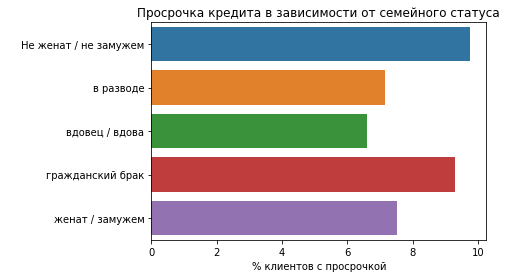

In [203]:
sns.barplot(x='ratio_%',
            y=data_pivot_family.index,
            data=data_pivot_family)
plt.title('Просрочка кредита в зависимости от семейного статуса')
plt.xlabel("% клиентов с просрочкой")
plt.ylabel(" ")
plt.show()

**Вывод**

Меньше всего шансов просрочить выплату по кредиту у вдовцов/вдов и клиентов в разводе, на втором месте клиенты в браке, и чуть менее пунктуальны с выплатами по кредиту холостые и клиенты в гражданском браке.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

*Создаем сводную таблицу по категориям дохода и кредитной задолженности c подсчетом кол-ва в каждой и сохраняем в переменную, создаем новый столбец, в котором считаем отношение кол-ва клиентов с задолженностью по кредиту к общему кол-ву клиентов с кредитом, переводим в проценты и окургляем до 2-х знаков после запятой методом round.*

In [204]:
data_pivot_income = data.pivot_table(
    index='categorized_income', columns='debt', values='total_income', aggfunc='count')
data_pivot_income['ratio_%'] = round(
    data_pivot_income[1] / (data_pivot_income[1]+data_pivot_income[0])*100, 2)
data_pivot_income.sort_values(by='ratio_%', ascending=False)

debt,0,1,ratio_%
categorized_income,,,
выше среднего,15742,1394,8.13
средний,3895,339,8.01
ниже среднего,101,7,6.48


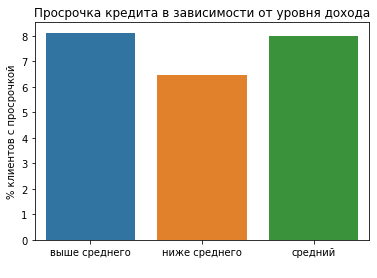

In [205]:
sns.barplot(x=data_pivot_income.index,
            y='ratio_%',
            data=data_pivot_income)
plt.title('Просрочка кредита в зависимости от уровня дохода')
plt.xlabel(" ")
plt.ylabel("% клиентов с просрочкой")
plt.show()

**Вывод**

Реже всего задолженность по кредиту возникает у клиентов с доходом ниже среднего. Зависимость есть, но разница в пределах 1,5%.

- Как разные цели кредита влияют на его возврат в срок?

*Создаем сводную таблицу по целям кредита и кредитной задолженности c подсчетом кол-ва в каждой и сохраняем в переменную, создаем новый столбец, в котором считаем отношение кол-ва клиентов с задолженностью по кредиту 
к общему кол-ву клиентов с кредитом, переводим в проценты и окургляем до 2-х знаков после запятой методом round.*

In [206]:
data_pivot_purpose = data.pivot_table(
    index='categorized_purpose', columns='debt', values='total_income', aggfunc='count')
data_pivot_purpose['ratio_%'] = round(
    data_pivot_purpose[1] / (data_pivot_purpose[1]+data_pivot_purpose[0])*100, 2)
data_pivot_purpose.sort_values(by='ratio_%', ascending=False)

debt,0,1,ratio_%
categorized_purpose,,,
автомобиль,3902,402,9.34
образование,3642,370,9.22
свадьба,2160,186,7.93
недвижимость,10034,782,7.23


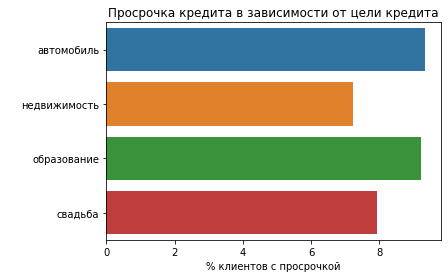

In [207]:
sns.barplot(x='ratio_%',
            y=data_pivot_purpose.index,
            data=data_pivot_purpose)
plt.title('Просрочка кредита в зависимости от цели кредита')
plt.xlabel("% клиентов с просрочкой")
plt.ylabel(" ")
plt.show()

**Вывод**

Чаще возвращают в срок кредиты, взятые на свадьбу и операции с недвижимостью.

## Общий вывод

В ходе исследования были изучены данные о платежеспособности клиентов банка и даны ответы на поставленные вопросы:

- Есть ли зависимость между наличием детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

Сформировался портрет самого частого клиента банка, это человек:

 - со средним образованием
 - в браке
 - с доходом выше среднего
 - без детей
 - сотрудник

Также было выявлено 4 основные цели кредита:

- автомобиль 
- недвижимость 
- образование
- свадьба


Несмотря на то, что в общей массе разница по рассмотренным категориям в возврате кредита в срок сотавляет не более 2%, благодаря полученным данным можно охарактеризовать клиента, который с меньшей долей вероятности будет задерживать оплату по кредиту, это человек:

- в разводе (7,14% просрочки) или вдовец/вдова (6,59% просрочки)
- без детей (7,51% просрочки против 9,24% у клиентов с детьми)
- с зароботком ниже среднего (6,48% просрочки против 8,01% и 8,13% у среднего и выше среднего)
- решивший взять кредит на свадьбу (7,93% просрочки) или на операции с недвижимостью (7,23% просрочки)
